# 1. 驗證Nvidia GPU及CUDA版本

In [1]:
!nvidia-smi
!/usr/local/cuda/bin/nvcc --version

Tue Jun  6 18:12:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#2. 下載darknet

In [2]:
# 下載darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15521, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15521 (delta 0), reused 5 (delta 0), pack-reused 15514
Receiving objects: 100% (15521/15521), 14.19 MiB | 21.03 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.


# 3.修改Makefile參數
將GPU, CUDNN, CUDNN_HALF, OPENCV設為可用

GPU=0 --> GPU=1

CUDNN=0 --> CUDNN=1

CUDNN_HALF=0 --> CUDNN_HALF=1

OPENCV=0 --> OPENCV=1

In [3]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


#4. 編譯darknet

In [4]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |        

# 5.下載自行標註資料

In [5]:
#回到使用者根目錄
%cd /content
# 下載資料集和相關參數檔
!git clone https://github.com/hahahafish/YoloV4-Tiny_badminton
!ls

/content
Cloning into 'YoloV4-Tiny_badminton'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 21 (delta 0), reused 2 (delta 0), pack-reused 18
Unpacking objects: 100% (21/21), 64.91 MiB | 8.55 MiB/s, done.
darknet  sample_data  YoloV4-Tiny_badminton


# 6.搬移模型及相關設定檔

In [6]:
# 相關參數到對應路徑下
!cp YoloV4-Tiny_badminton/yolov4-tiny-obj.cfg darknet/cfg
!cp YoloV4-Tiny_badminton/yolov4-tiny-obj_last.weights darknet/cfg
!ls darknet/cfg
!cp YoloV4-Tiny_badminton/obj.names darknet/data
!cp YoloV4-Tiny_badminton/obj.data darknet/data
!cp YoloV4-Tiny_badminton/train.txt darknet/data
!cp YoloV4-Tiny_badminton/test.txt darknet/data
!ls darknet/data
# 將資料集解壓縮到指定路徑
!unzip YoloV4-Tiny_badminton/my_dataset.zip -d darknet/data
!ls darknet/data/origin/

9k.labels				    tiny-yolo-voc.cfg
9k.names				    tiny-yolo_xnor.cfg
9k.tree					    vgg-16.cfg
alexnet.cfg				    vgg-conv.cfg
cd53paspp-gamma.cfg			    voc.data
cifar.cfg				    writing.cfg
cifar.test.cfg				    yolo.2.0.cfg
coco9k.map				    yolo9000.cfg
coco.data				    yolo.cfg
coco.names				    yolov1
combine9k.data				    yolov2.cfg
crnn.train.cfg				    yolov2-tiny.cfg
csdarknet53-omega.cfg			    yolov2-tiny-voc.cfg
cspx-p7-mish.cfg			    yolov2-voc.cfg
cspx-p7-mish_hp.cfg			    yolov3_5l.cfg
cspx-p7-mish-omega.cfg			    yolov3.cfg
csresnext50-panet-spp.cfg		    yolov3.coco-giou-12.cfg
csresnext50-panet-spp-original-optimal.cfg  yolov3-openimages.cfg
darknet19_448.cfg			    yolov3-spp.cfg
darknet19.cfg				    yolov3-tiny_3l.cfg
darknet53_448_xnor.cfg			    yolov3-tiny.cfg
darknet53.cfg				    yolov3-tiny_obj.cfg
darknet.cfg				    yolov3-tiny_occlusion_track.cfg
densenet201.cfg				    yolov3-tiny-prn.cfg
efficientnet_b0.cfg			    yolov3-tiny_xnor.cfg
efficientnet-lite3.cfg			 

#7. 測試訓練結果

## 7.1圖片

/content/darknet
 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 

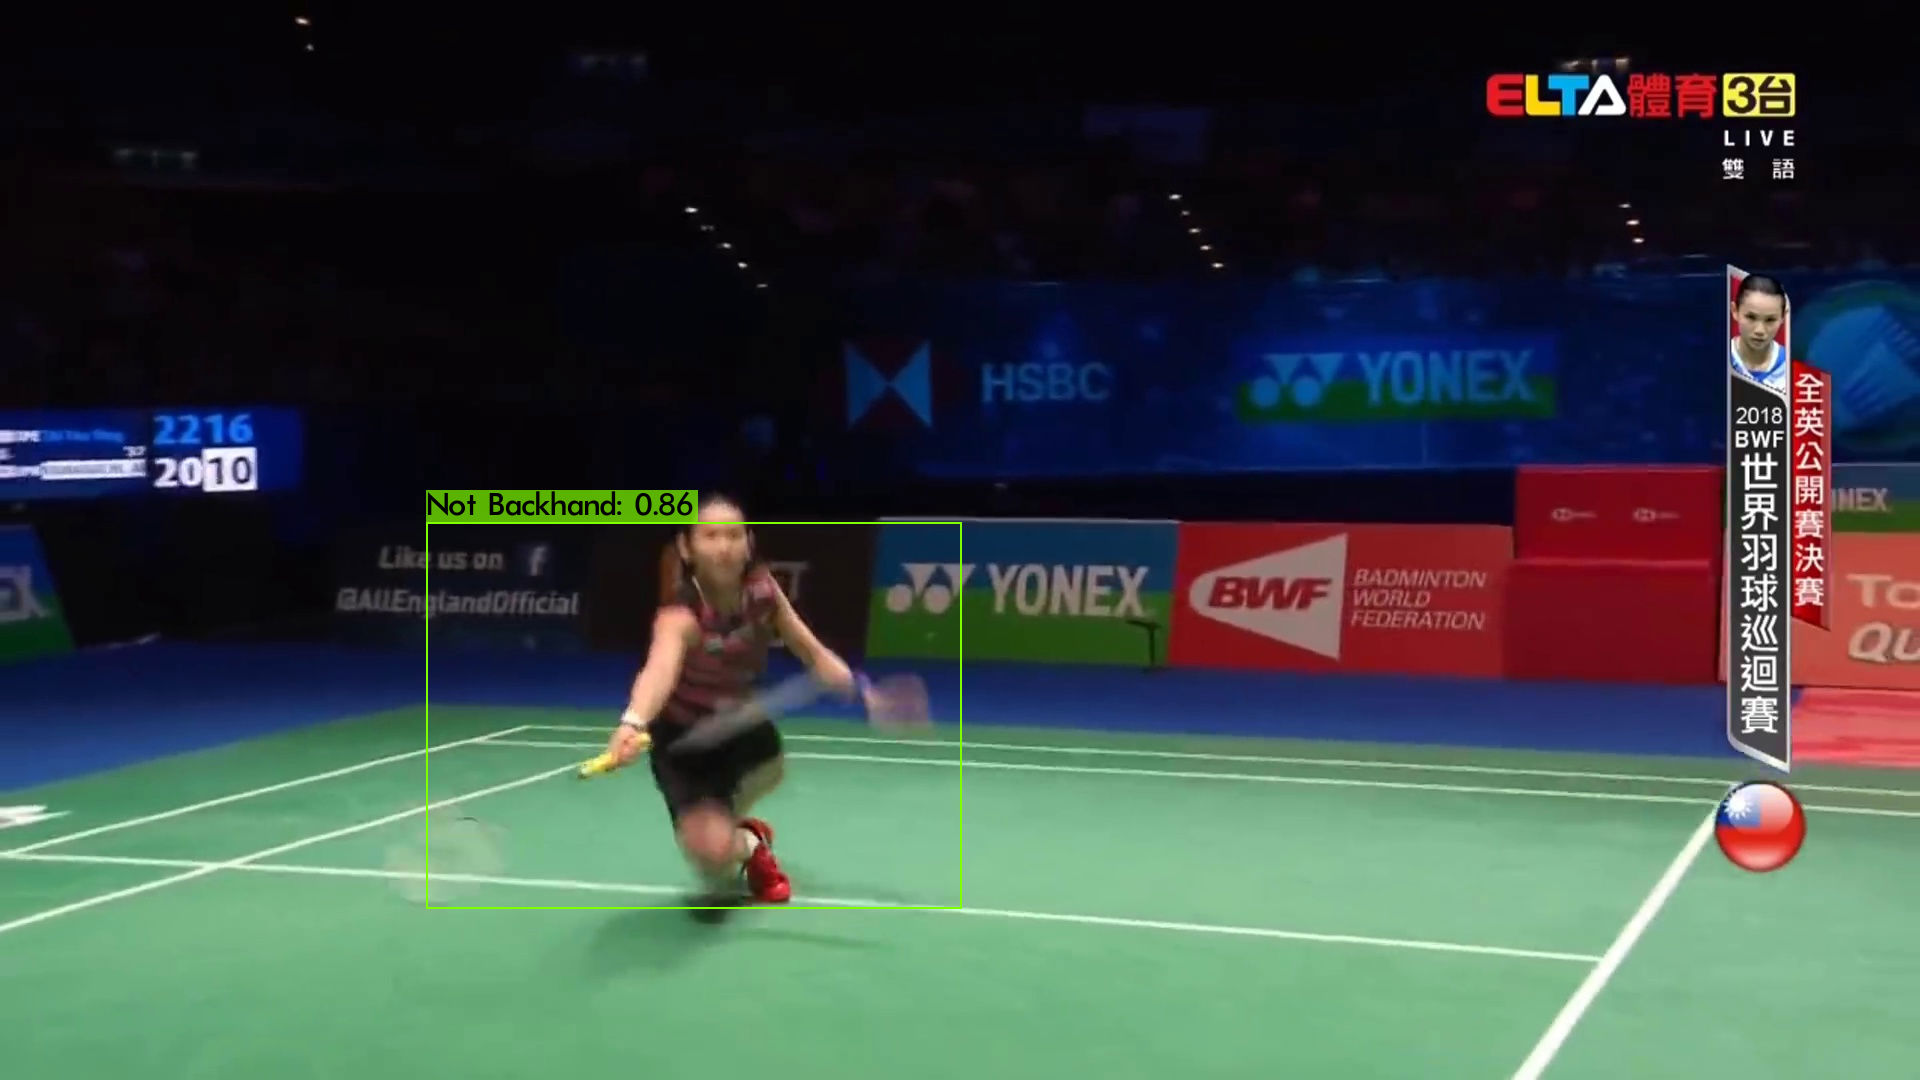

In [7]:
%cd /content/darknet
!./darknet detector test data/obj.data cfg/yolov4-tiny-obj.cfg cfg/yolov4-tiny-obj_last.weights ../YoloV4-Tiny_badminton/test_01.jpg

import cv2 # 導入OpenCV函式庫
from google.colab.patches import cv2_imshow # 導入Colab.patches函式庫

imgResult = cv2.imread('predictions.jpg') # 讀入結果影像
cv2_imshow(imgResult) # 顯示結果影像

## 7.2影片

In [8]:
#下載影片
%cd /content
!gdown --id 1QaLA4Jl_i12GNB0DrGJuiVeHR5yhNb5U --output test.mp4

/content
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1QaLA4Jl_i12GNB0DrGJuiVeHR5yhNb5U
To: /content/test.mp4
100% 3.33M/3.33M [00:00<00:00, 173MB/s]


In [9]:
%cd /content/darknet
!./darknet detector demo data/obj.data cfg/yolov4-tiny-obj.cfg cfg/yolov4-tiny-obj_last.weights ../test.mp4  -out_filename results.mp4 -dont_show

串流輸出內容已截斷至最後 5000 行。
 cvWriteFrame 
Objects:


FPS:74.4 	 AVG_FPS:58.0

 cvWriteFrame 
Objects:

Not Backhand: 56% 
Backhand: 27% 

FPS:75.2 	 AVG_FPS:58.0

 cvWriteFrame 
Objects:

Not RoundHead: 30% 

FPS:77.5 	 AVG_FPS:58.0

 cvWriteFrame 
Objects:

Not Backhand: 55% 

FPS:73.5 	 AVG_FPS:58.0

 cvWriteFrame 
Objects:

Not RoundHead: 51% 

FPS:75.5 	 AVG_FPS:58.0

 cvWriteFrame 
Objects:

Not RoundHead: 66% 

FPS:76.7 	 AVG_FPS:58.0

 cvWriteFrame 
Objects:

Not Backhand: 26% 
Not RoundHead: 82% 

FPS:78.2 	 AVG_FPS:58.0

 cvWriteFrame 
Objects:

Not Backhand: 51% 
Not RoundHead: 59% 

FPS:78.7 	 AVG_FPS:58.0

 cvWriteFrame 
Objects:

Not Backhand: 69% 
Not RoundHead: 52% 

FPS:80.0 	 AVG_FPS:58.0

 cvWriteFrame 
Objects:

Not Backhand: 85% 
Not RoundHead: 40% 

FPS:80.4 	 AVG_FPS:58.0

 cvWriteFrame 
Objects:

Backhand: 28% , Not Backhand: 79% 
Not RoundHead: 82% 

FPS:79.6 	 AVG_FPS:58.0

 cvWriteFrame 
Objects:

Backhand: 33% , Not Backhand: 67% 
Not RoundHead: 62% 

FPS:79.4 	 AV

In [10]:
# 壓縮影片，使Colab能正常播放 
!ffmpeg -y -i results.mp4 -vcodec libx264 compressed_results.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [11]:
#播放影片功能
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 400):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"

  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

In [12]:
# 播放影片
show_video('compressed_results.mp4')